# import statements
1. pandas (import pandas as pd): Used for reading and manipulating the dataset.
2. matplotlib.pyplot (import matplotlib.pyplot as plt): For visualizing data via plots like histograms, scatter plots, etc.
3. seaborn (import seaborn as sns): For enhanced data visualization such as heatmaps and histograms.
4. numpy (import numpy as np): Used for mathematical operations and data manipulation.
5. train_test_split from sklearn.model_selection: For splitting the dataset into training and testing sets.
6. StandardScaler, MinMaxScaler from sklearn.preprocessing: Used for feature scaling (standardizing or normalizing data).
7. LinearRegression from sklearn.linear_model: Used to implement the linear regression algorithm.
8. DecisionTreeRegressor from sklearn.tree: Implements decision tree regression.
9. RandomForestRegressor from sklearn.ensemble: Implements random forest regression.
10. SVR from sklearn.svm: Implements support vector regression.
11. mean_squared_error, r2_score from sklearn.metrics: Metrics for evaluating regression models (MSE and R² score).
12. joblib: Used for saving and loading models and scalers.
13. ydata_profiling: used for generating profiling report of the dataset.
14. tkinter: used for deploying the model in a GUI app based
15. adaboostregressor and KNeighborRegressor: imported from sklearn


In [1]:
# Reading the dataset
import pandas as pd
import numpy as np
teslaData=pd.read_csv('TESLA.csv', encoding='latin')
print('Shape before deleting duplicate values:', teslaData.shape)

# Removing duplicate rows if any
teslaData=teslaData.drop_duplicates()
print('Shape After deleting duplicate values:', teslaData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
teslaData.head(10)

Shape before deleting duplicate values: (253, 7)
Shape After deleting duplicate values: (253, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-29,259.933319,264.500000,256.893341,260.436676,260.436676,62828700
1,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000
2,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200
3,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900
4,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800
5,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400
6,2021-10-07,261.820007,268.333344,261.126678,264.536682,264.536682,57587400
7,2021-10-08,265.403320,265.459991,260.303345,261.829987,261.829987,50215800
8,2021-10-11,262.549988,267.079987,261.833344,263.980011,263.980011,42600900
9,2021-10-12,266.976654,270.773346,265.523346,268.573334,268.573334,66060000


# Step 1: Reading the dataset
Variable Used: teslaData

teslaData = pd.read_csv('TESLA.csv'): Reads the Tesla stock CSV file.

teslaData = teslaData.drop_duplicates(): Removes duplicate rows.

Summary: The dataset is loaded, duplicates are removed, and a cleaned version of the dataset is prepared for further analysis.

# Key Observation for step 1

This file contains 253 Details of Tesla stock price data.

There are 7 attributes, which are outlined below:



*  Date - The date of the stock record.
*  Open - The stock's opening price on the respective day.
*  High - The highest price the stock reached during the day.
*  Low - The lowest price the stock reached during the day.
*  Close - The stock's closing price on the respective day.
*  Adj Close - The adjusted closing price after corrections (dividends or splits).
*  Volume - The total number of shares traded on the respective day.(This is the Target or Class Variable, which needs to be predicted by the proposed regression model!)















# Step 2: Problem Statement Definition
**Problem**: Creating a prediction model to forecast the closing price of Tesla stock.

**Target Variable**: Close (or Adj Close)

**independent_variables/Features**: Open, High, Low, Volume

In [2]:
print("Data Shape:", teslaData.shape)
print("Columns:", teslaData.columns)
target_variable = 'Close'
independent_variables = ['Open', 'High', 'Low', 'Volume']  # features
print(f"Predicting {target_variable} using: {', '.join(independent_variables)}.")

Data Shape: (253, 7)
Columns: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Predicting Close using: Open, High, Low, Volume.


# Step 3 Visualising the distribution of Target variable


The distribution of the target variable (the ‘Close’ price) is visualized using a histogram. This allows us to understand whether the target variable is skewed or normally distributed and helps in identifying potential outliers or trends.

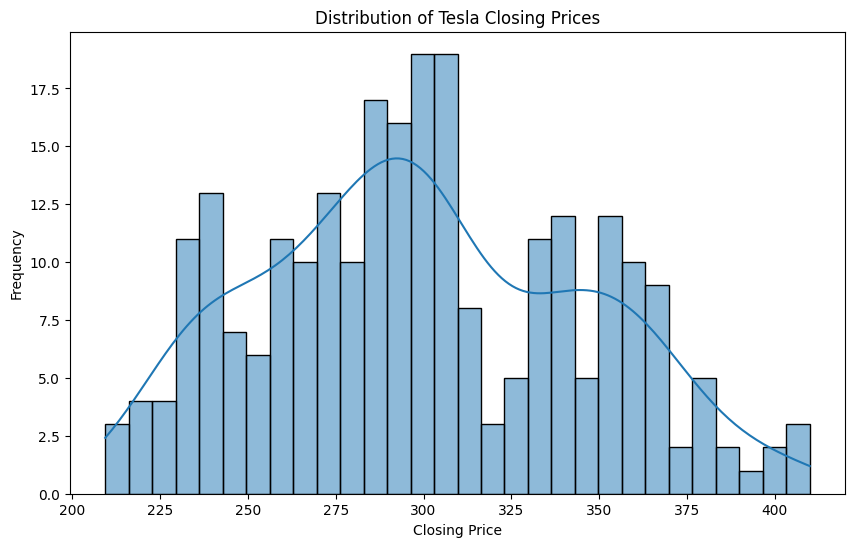

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(teslaData['Close'], bins=30, kde=True)  # Histogram with KDE
plt.title('Distribution of Tesla Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

# step 4: Data exploration at basic level

Basic statistics are computed for the dataset to gain insight into the distribution of each feature.



In [4]:
# Looking at sample rows in the data
teslaData.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-29,259.933319,264.500000,256.893341,260.436676,260.436676,62828700
1,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000
2,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200
3,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900
4,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800


In [5]:
# Looking at sample rows in the data
teslaData.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
248,2022-09-23,283.089996,284.500000,272.820007,275.329987,275.329987,63615400
249,2022-09-26,271.829987,284.089996,270.309998,276.010010,276.010010,58076900
250,2022-09-27,283.839996,288.670013,277.510010,282.940002,282.940002,61925200
251,2022-09-28,283.079987,289.000000,277.570007,287.809998,287.809998,54664800
252,2022-09-29,282.760010,283.649994,265.779999,268.209991,268.209991,77393100


In [6]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
teslaData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [7]:
# Looking at the descriptive statistics of the data
teslaData.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume
count,253,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
unique,253,NaN,NaN,NaN,NaN,NaN,NaN
top,2021-09-29,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,300.136008,307.486021,292.114058,299.709104,299.709104,8.050938e+07
std,NaN,46.139272,46.789896,44.685331,45.788283,45.788283,2.546595e+07
min,NaN,207.949997,217.973328,206.856674,209.386673,209.386673,3.504270e+07
25%,NaN,266.513336,273.166656,260.723328,266.923340,266.923340,6.255570e+07
50%,NaN,298.500000,303.709991,289.130005,296.666656,296.666656,7.695630e+07
75%,NaN,335.600006,344.950012,327.510010,336.336670,336.336670,9.347310e+07


In [8]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the number of unique values are < 20 then the variable is likely to be a category otherwise continuous
teslaData.nunique()

Date         253
Open         249
High         251
Low          251
Close        252
Adj Close    252
Volume       253
dtype: int64

# Step 5: Visual Exploratory Data Analysis (EDA) of data (with histogram and barcharts)**

Histograms are generated for each independent variable (e.g., ‘Open’, ‘High’, ‘Low’, and ‘Volume’) to examine their distributions. Scatter plots are also used to visualize the relationships between each independent variable and the target variable (‘Close’). These plots help in understanding the data patterns and identifying potential correlations.

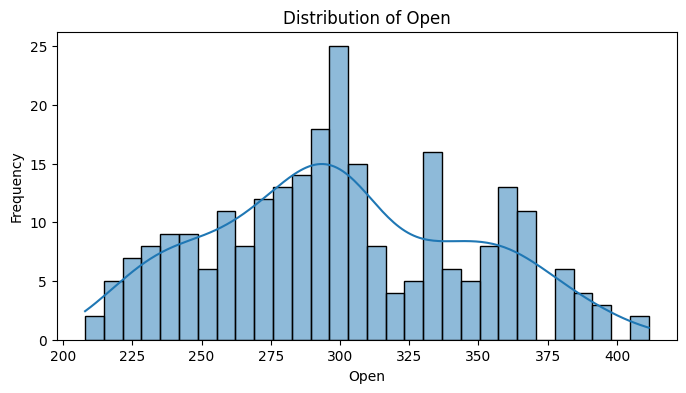

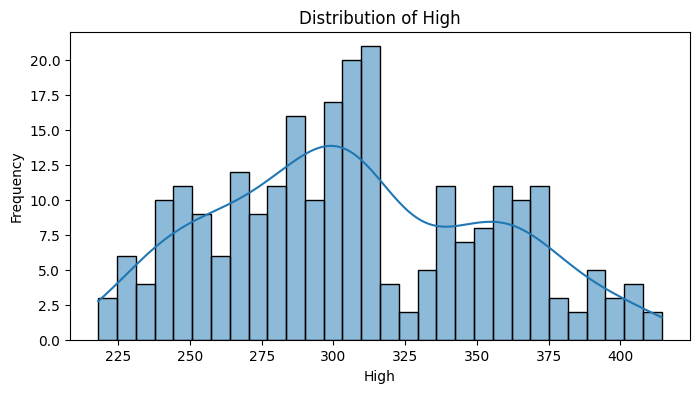

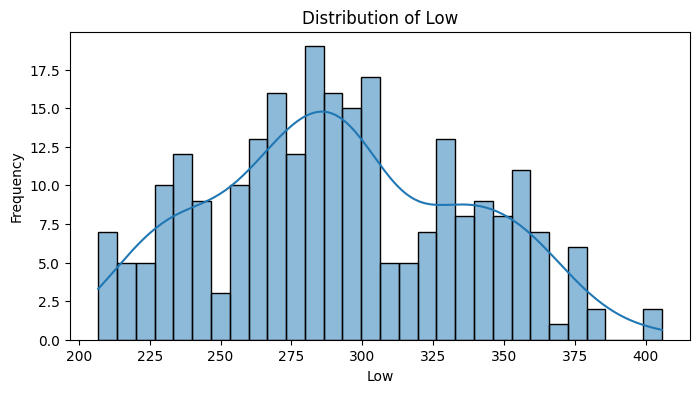

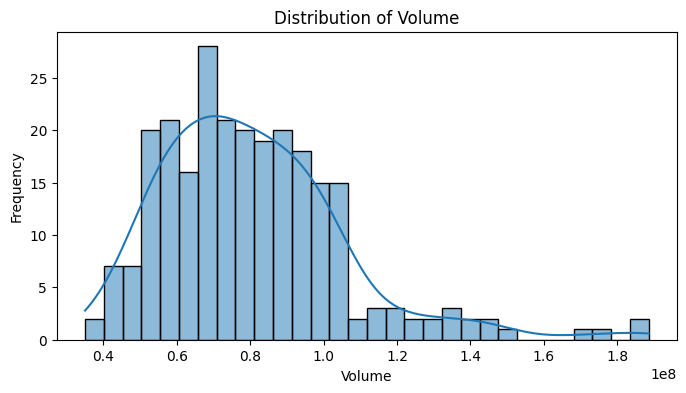

In [9]:
# Plotting histograms of independent variables
for col in independent_variables:
    plt.figure(figsize=(8, 4))
    sns.histplot(teslaData[col], bins=30, kde=True)  # Hist of each feature
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## Scatterplots to see the relation between independent variables and the target variable

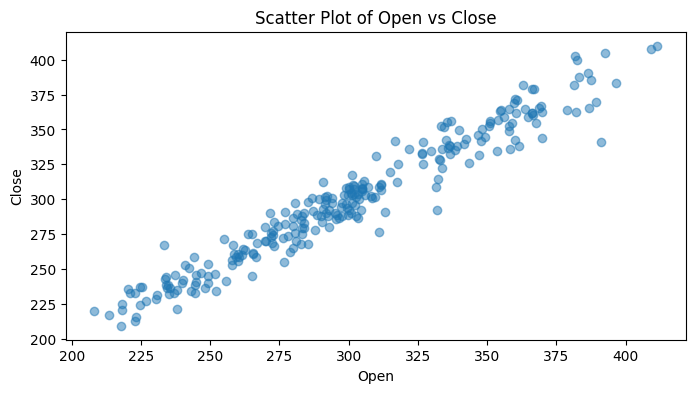

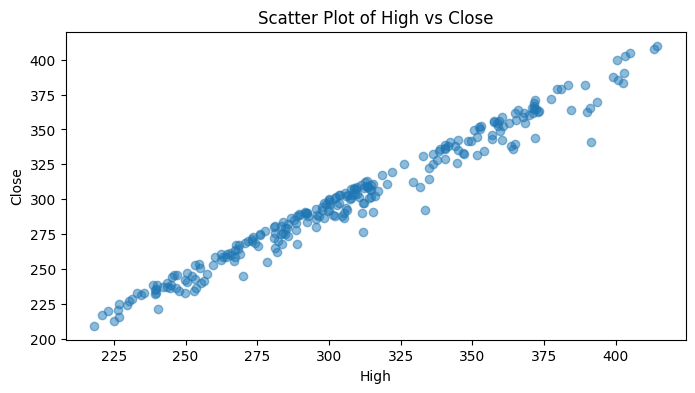

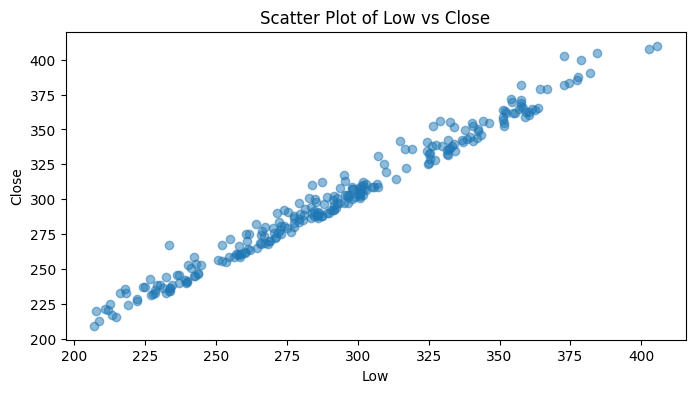

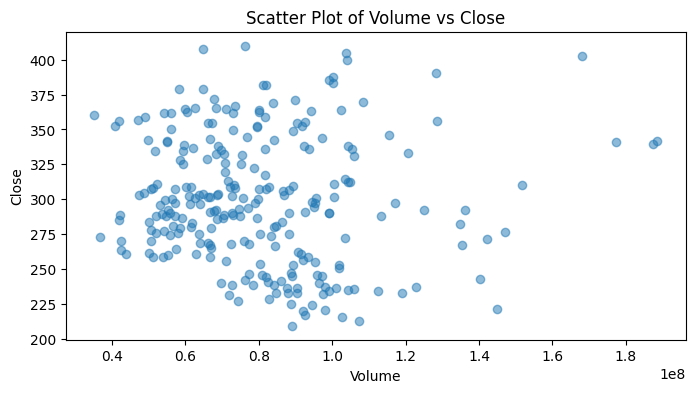

In [10]:
for col in independent_variables:
    plt.figure(figsize=(8, 4))
    plt.scatter(teslaData[col], teslaData[target_variable], alpha=0.5)
    plt.title(f'Scatter Plot of {col} vs {target_variable}')
    plt.xlabel(col)
    plt.ylabel(target_variable)
    plt.show()

# using ydata_profiling report to generate the profile report for the dataset and save in a html file.
ydata_profiling is a updated module of pandas profiling which analyzes the dataset and generate an extensive report for every variables which includes histograms, scatterplots, heatmap. it also shows every details needed for analyzation like missing values, skewness and many things

In [11]:
#importing the module
from ydata_profiling import ProfileReport

file_path = "TESLA.csv" 
tesla_data = pd.read_csv(file_path, encoding="latin")

# Create a profiling report for better data understanding
profile = ProfileReport(tesla_data, title="Tesla Stock Data Profiling Report", explorative=True)

# Save the report to an HTML file for later viewing
profile.to_file("tesla_stock_data_profiling_report.html")

C:\Users\poude\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 14.74it/s]


# Step 6: Outlier analysis

Open: Selected. The distribution is good.

High: Selected. The distribution is good.

Low: Selected. The distribution is good.

Close: Selected. The distribution is good.

Adj Close: Selected. The distribution is good.

Volume: Selected. The distribution is good.


Looking at the distribution and the histogram, the outlier analysis is not needed.

In [12]:
#if there were outliers in the dataset this will be the block of code to analyze and remove the outliers from the dataset

# def remove_outliers(df, col):
#     Q1 = df[col].quantile(0.25)  # 1st Quartile
#     Q3 = df[col].quantile(0.75)  # 3rd Quartile
#     IQR = Q3 - Q1  # Interquartile Range
#     lower_bound = Q1 - 1.5 * IQR  # Lower fence
#     upper_bound = Q3 + 1.5 * IQR  # Upper fence
#     return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]  # Keep values inside bounds

# for col in independent_variables:
#     teslaData = remove_outliers(teslaData, col)

# Step 7: Missing values analysis - Options for treating the missing values

In [13]:
# Finding how many missing values are there for each column
teslaData.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

After checking for missing values, it was found that there are no missing values in the dataset.
Therefore, no imputation or removal of missing data is necessary.

In [14]:
#fi there were missing values found on the dataset this will be the code to treat the missing values

# teslaData = teslaData.dropna(subset=independent_variables)
# teslaData['Close'] = teslaData['Close'].interpolate(method='linear')  # Fill missing with linear interpolation
# print("Missing values after treatment:")
# print(teslaData.isnull().sum()) #check again for missing values after treatment

# Step 8: Feature selection - Visual and statistic correlation analysis for selection of best features


A correlation matrix is computed to evaluate the linear relationships between the independent variables and the target variable (‘Close’). This matrix helps in identifying which features are most strongly correlated with the target variable and are likely to be valuable predictors in the model. A heatmap is also generated to visualize these correlations.

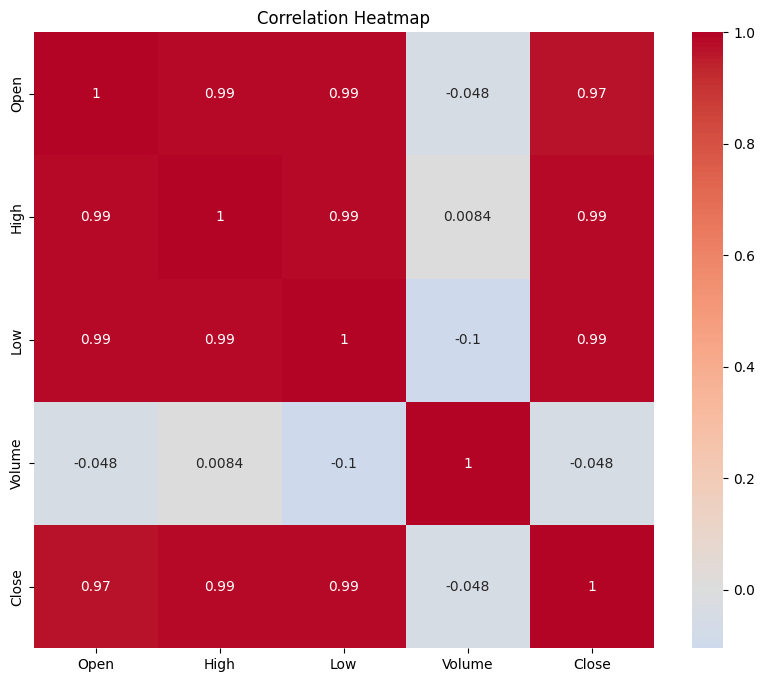

In [15]:
correlation_matrix = teslaData[independent_variables + [target_variable]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')  # Heatmap to show correlation between variables
plt.show()

For this dataset, the Target variable is Continuous, hence:
Continuous Target Variable Vs Continuous Predictor

In [16]:
# Calculating correlation matrix
ContinuousCols=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Creating the correlation matrix
CorrelationData=teslaData[ContinuousCols].corr()
CorrelationData

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.991269,0.986364,0.971783,0.971783,-0.047793
High,0.991269,1.000000,0.988299,0.986715,0.986715,0.008397
Low,0.986364,0.988299,1.000000,0.990137,0.990137,-0.104980
Close,0.971783,0.986715,0.990137,1.000000,1.000000,-0.047791
Adj Close,0.971783,0.986715,0.990137,1.000000,1.000000,-0.047791
Volume,-0.047793,0.008397,-0.104980,-0.047791,-0.047791,1.000000


In [17]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['Close'][abs(CorrelationData['Close']) > 0.5 ]

Open         0.971783
High         0.986715
Low          0.990137
Close        1.000000
Adj Close    1.000000
Name: Close, dtype: float64

**Since there is no catagorial variable in this data set, hence no need for Categorical Vs Continuous -- Box Plots.**

# Step 9: Statistical feature selection (categorical vs. continuous) using ANOVA test

**Since this data set doesnt have Categorical variable, hence no need for statiscal feature selection.**

# Step 10: Selecting final independent_variables/features for building machine learning/AI model 

Based on the correlation analysis, the final features for the model are selected. In this case, ‘Open’, ‘High’, and ‘Low’ are selected as the most relevant predictors for the ‘Close’ price, while ‘Volume’ is excluded from prediction but still analyzed for relationships with ‘Close’.
the final independent_variables are selected based on the coorelation with target variable which is >0.5



In [18]:
strong_features = correlation_matrix['Close'].abs().sort_values(ascending=False)
final_features = strong_features[strong_features > 0.5].index.tolist()  # Keep high-corr features
final_features.remove('Close')  # We don't want target in feature list

# Selecting final columns
DataForML=teslaData[final_features]
DataForML.head()

,Low,High,Open
0,256.893341,264.500000,259.933319
1,258.333344,263.043335,260.333344
2,254.529999,260.260010,259.466675
3,258.706665,268.989990,265.500000
4,258.066681,265.769989,261.600006


# Step 11: Data conversion to numeric values for machine learning/predictive analysis

since all the data in TESLA dataser were numeric the conversion was not needed



# Step 12: Train/test data split and standardisation/normalisation of data

The dataset is split into training and testing sets, with 80% of the data used for training and 20% used for testing. The features are then standardized (scaled) to ensure that the models perform consistently by normalizing the ranges of the features. usinf MinMaxScaler

In [19]:
TargetVariable='Close'
Predictors=['Open', 'High', 'Low']

X = teslaData[final_features]
y = teslaData['Close']

In [20]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
### Standardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#independent_variablescaler=StandardScaler()
independent_variablescaler=MinMaxScaler()

# Storing the fit object for later reference
independent_variablescalerFit=independent_variablescaler.fit(X)

# Generating the standardized values of X
X=independent_variablescalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(177, 3)
(177,)
(76, 3)
(76,)


# Step 13: Investigating multiple regression algorithms


**Liner Regression**

In [23]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Close']-TestingDataResults['PredictedClose']))/TestingDataResults['Close'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.9902695369579309

##### Model Validation and Accuracy Calculations ##########
       Open      High       Low  Close  PredictedClose
0  0.331690  0.332412  0.354347    NaN           277.0
1  0.272974  0.256255  0.264691    NaN           267.0
2  0.536408  0.594722  0.610079    NaN           319.0
3  0.321194  0.319623  0.335446    NaN           275.0
4  0.343963  0.374985  0.339262    NaN           288.0
Mean Accuracy on test data: 81.79480566093333
Median Accuracy on test data: nan

Accuracy values for 10-fold Cross Validation:
 [99.1012797  98.94516776 98.75934196 98.34973459 98.78485598 98.58786141
 98.70412816 98.8198782  99.03399031 99.13283279]

Final Average Accuracy of the model: 98.82


**Decision Tree**

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.992727206124594

##### Model Validation and Accuracy Calculations ##########
       Open      High       Low  Close  PredictedClose
0  0.331690  0.332412  0.354347    NaN           276.0
1  0.272974  0.256255  0.264691    NaN           261.0
2  0.536408  0.594722  0.610079    NaN           324.0
3  0.321194  0.319623  0.335446    NaN           276.0
4  0.343963  0.374985  0.339262    NaN           281.0
Mean Accuracy on test data: 82.09834265744078
Median Accuracy on test data: nan

Accuracy values for 10-fold Cross Validation:
 [98.1058642  97.89561433 98.35482454 97.22622642 97.89060486 97.55153967
 97.77658567 97.8088061  98.4447394  98.64045989]

Final Average Accuracy of the model: 97.97


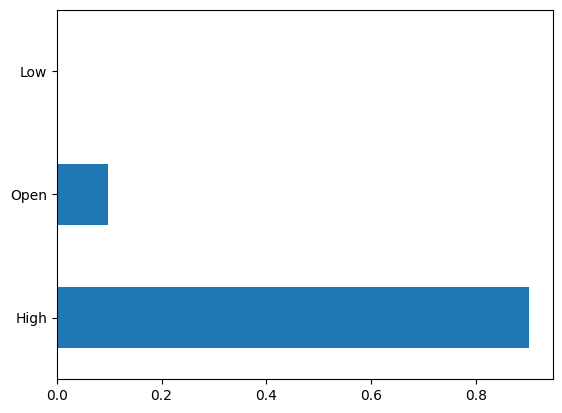

In [24]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Close']-TestingDataResults['PredictedClose']))/TestingDataResults['Close'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

**Random forest regressor**

RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=400)
R2 Value: 0.9906538087214408

##### Model Validation and Accuracy Calculations ##########
       Open      High       Low  Close  PredictedClose
0  0.331690  0.332412  0.354347    NaN           276.0
1  0.272974  0.256255  0.264691    NaN           264.0
2  0.536408  0.594722  0.610079    NaN           325.0
3  0.321194  0.319623  0.335446    NaN           275.0
4  0.343963  0.374985  0.339262    NaN           282.0
Mean Accuracy on test data: 82.1554475534183
Median Accuracy on test data: nan

Accuracy values for 10-fold Cross Validation:
 [98.6539043  98.26244826 98.38016279 97.54762783 98.03586156 98.03950129
 97.73776028 98.35567729 98.54084163 98.81160771]

Final Average Accuracy of the model: 98.24


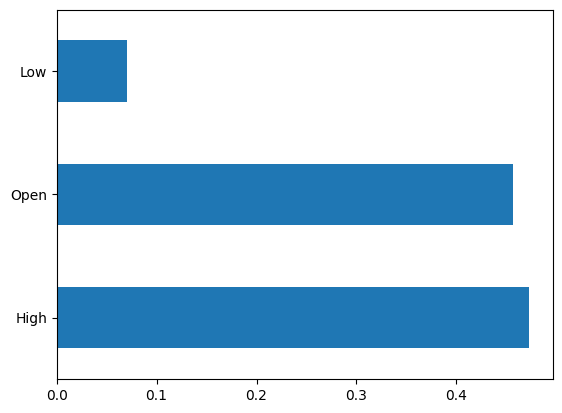

In [25]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400,criterion='friedman_mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Close']-TestingDataResults['PredictedClose']))/TestingDataResults['Close'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

**adaboost regressor**

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)
R2 Value: 0.9858833087055144

##### Model Validation and Accuracy Calculations ##########
       Open      High       Low  Close  PredictedClose
0  0.331690  0.332412  0.354347    NaN           277.0
1  0.272974  0.256255  0.264691    NaN           262.0
2  0.536408  0.594722  0.610079    NaN           330.0
3  0.321194  0.319623  0.335446    NaN           277.0
4  0.343963  0.374985  0.339262    NaN           282.0
Mean Accuracy on test data: 81.9269678619106
Median Accuracy on test data: nan

Accuracy values for 10-fold Cross Validation:
 [98.27158218 98.127147   98.02570213 97.19213102 97.83848108 98.02161225
 96.79451681 97.68763219 98.46182033 98.66013191]

Final Average Accuracy of the model: 97.91


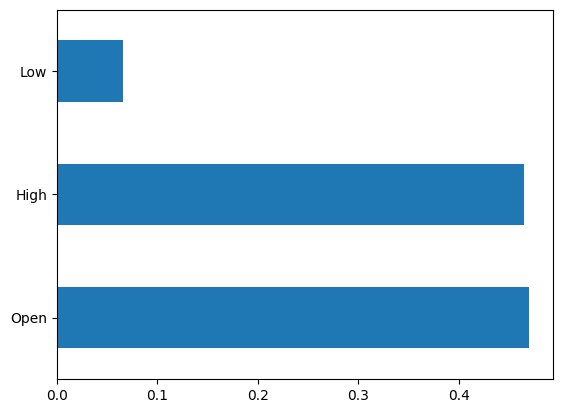

In [26]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Close']-TestingDataResults['PredictedClose']))/TestingDataResults['Close'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

**K-Nearest neighbour regressor**

In [27]:
#kNN
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Close']-TestingDataResults['PredictedClose']))/TestingDataResults['Close'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.9898694321377063

##### Model Validation and Accuracy Calculations ##########
       Open      High       Low  Close  PredictedClose
0  0.331690  0.332412  0.354347    NaN           275.0
1  0.272974  0.256255  0.264691    NaN           262.0
2  0.536408  0.594722  0.610079    NaN           331.0
3  0.321194  0.319623  0.335446    NaN           276.0
4  0.343963  0.374985  0.339262    NaN           291.0
Mean Accuracy on test data: 82.05135381697899
Median Accuracy on test data: nan

Accuracy values for 10-fold Cross Validation:
 [98.85823329 97.91891199 98.02247554 97.44648806 98.46972206 97.95376141
 97.98786842 98.5317956  98.59570619 99.04767113]

Final Average Accuracy of the model: 98.28


# Vector Machines(SVM)

In [28]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)

# Printing all the parameters
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Close']-TestingDataResults['PredictedClose']))/TestingDataResults['Close'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

SVR(C=50, gamma=0.01)
R2 Value: 0.7168729533735276

##### Model Validation and Accuracy Calculations ##########
       Open      High       Low  Close  PredictedClose
0  0.331690  0.332412  0.354347    NaN           288.0
1  0.272974  0.256255  0.264691    NaN           281.0
2  0.536408  0.594722  0.610079    NaN           311.0
3  0.321194  0.319623  0.335446    NaN           286.0
4  0.343963  0.374985  0.339262    NaN           289.0
Mean Accuracy on test data: 84.82160487275839
Median Accuracy on test data: nan

Accuracy values for 10-fold Cross Validation:
 [94.48710564 91.19796254 93.50386212 97.63142591 96.06475752 95.59480301
 87.68542004 86.77932429 98.19121899 97.92140867]

Final Average Accuracy of the model: 93.91


# Step 14: Selection of the best model

The best model is selected based on the R² score, which indicates how well the model explains the variance in the target variable (‘Close’). The model with the highest R² score is chosen as the best-performing model.



In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Define the Linear Regression model
RegModel = LinearRegression()

# Running 10-Fold Cross-validation on Linear Regression
Accuracy_Values = cross_val_score(RegModel, X, y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))


Accuracy values for 10-fold Cross Validation:
 [99.1012797  98.94516776 98.75934196 98.34973459 98.78485598 98.58786141
 98.70412816 98.8198782  99.03399031 99.13283279]

Final Average Accuracy of the model: 98.82


# Retraining the model with 100% data
since the splitting and training is not needed for the final deployment we are training the model on 100% of the data available

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
import joblib

# Step 1: Load your full dataset
tesla_data = pd.read_csv('TESLA.csv')
tesla_data_cleaned = tesla_data.drop_duplicates()

# Step 2: Define features (X) and target (y)
X = tesla_data_cleaned[['Open', 'High', 'Low']]  # Using 'Open', 'High', 'Low' as features
y = tesla_data_cleaned['Close']

# Step 3: Normalize the features with MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train the model on 100% of the data
model = LinearRegression()
model.fit(X_scaled, y)

# Step 5: Save the model and the scaler
joblib.dump(model, 'best_model_retrained.pkl')
joblib.dump(scaler, 'scaler_retrained.pkl')

print("Model retrained and saved successfully.")


Model retrained and saved successfully.


# creating a python function for prediction based on the retrained model

In [31]:
import joblib
import numpy as np

# Load the saved model and scaler
model = joblib.load('best_model_retrained.pkl')
scaler = joblib.load('scaler_retrained.pkl')

def predict_tesla_stock(open_price, high_price, low_price):
    # Prepare the input data
    input_data = np.array([[open_price, high_price, low_price]])
    
    # Scale the input data
    input_data_scaled = scaler.transform(input_data)
    
    # Predict the closing price
    predicted_price = model.predict(input_data_scaled)
    
    return predicted_price[0]

# Test the function
test_prediction = predict_tesla_stock(300.0, 310.0, 295.0)
print(f"Predicted Closing Price: {test_prediction:.2f}")


Predicted Closing Price: 304.35


C:\Users\poude\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


# testing with unseen data


In [32]:
# Example of testing with unseen data
unseen_data_prediction = predict_tesla_stock(305.0, 315.0, 298.0)
print(f"Test Prediction for Unseen Data: {unseen_data_prediction:.2f}")


Test Prediction for Unseen Data: 307.62


C:\Users\poude\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


# Step 15: Deployment of the predictor model using tKinter

the app asks for open value, High value and close value and predicts the closing value based on the training of the ML model.

this app takes input for low high and open price and shows the predicted price to the user. 
input validation has been implemented for the better functionality of the predictor. 

loading the scaler and model from retrained data is dont at the begining of the code

chasses are used and functions are created for the steps

In [35]:
import tkinter as tk
from tkinter import messagebox
import pandas as pd
import joblib

class TeslaStockPredictionApp:
    def __init__(self, master):
        self.master = master
        self.master.title('Tesla Stock Price Prediction')
        
        # Load the saved model and scaler
        try:
            self.model = joblib.load('best_model_retrained.pkl')
            self.scaler = joblib.load('scaler_retrained.pkl')
        except Exception as e:
            messagebox.showerror('Error', f'Could not load model/scaler: {str(e)}')
            self.master.quit()

        # Create GUI widgets
        self.create_widgets()

    def create_widgets(self):
        # Title Label
        title_label = tk.Label(self.master, text="Tesla Stock Price Predictor", font=("Helvetica", 16, "bold"), bg="#f0f0f0", fg="#333")
        title_label.pack(pady=20)

        # Frame to organize input fields
        input_frame = tk.Frame(self.master, bg="#f0f0f0")
        input_frame.pack(pady=10)

        # Labels and entry fields for input
        tk.Label(input_frame, text="Open Price", font=("Arial", 12), bg="#f0f0f0").grid(row=0, column=0, padx=10, pady=5, sticky="w")
        tk.Label(input_frame, text="High Price", font=("Arial", 12), bg="#f0f0f0").grid(row=1, column=0, padx=10, pady=5, sticky="w")
        tk.Label(input_frame, text="Low Price", font=("Arial", 12), bg="#f0f0f0").grid(row=2, column=0, padx=10, pady=5, sticky="w")

        self.open_entry = tk.Entry(input_frame, font=("Arial", 12), width=15)
        self.high_entry = tk.Entry(input_frame, font=("Arial", 12), width=15)
        self.low_entry = tk.Entry(input_frame, font=("Arial", 12), width=15)

        self.open_entry.grid(row=0, column=1, padx=10, pady=5)
        self.high_entry.grid(row=1, column=1, padx=10, pady=5)
        self.low_entry.grid(row=2, column=1, padx=10, pady=5)

        # Button to trigger prediction
        predict_button = tk.Button(self.master, text="Predict", font=("Arial", 12, "bold"), bg="#4CAF50", fg="white", command=self.predict_price)
        predict_button.pack(pady=10)

        # Button to clear inputs
        clear_button = tk.Button(self.master, text="Clear", font=("Arial", 12, "bold"), bg="#5BC0DE", fg="white", command=self.clear_inputs)
        clear_button.pack(pady=10)

        # Exit Button
        exit_button = tk.Button(self.master, text="Exit", font=("Arial", 12, "bold"), bg="#D9534F", fg="white", command=self.exit_app)
        exit_button.pack(pady=10)

        # Footer Label
        footer_label = tk.Label(self.master, text="Tadaaa", font=("Arial", 10), bg="#f0f0f0", fg="#555")
        footer_label.pack(side="bottom", pady=10)

    def predict_price(self):
        try:
            # Get and validate input values
            open_price = self.validate_input(self.open_entry.get(), "Open Price")
            high_price = self.validate_input(self.high_entry.get(), "High Price")
            low_price = self.validate_input(self.low_entry.get(), "Low Price")
            
            if open_price is None or high_price is None or low_price is None:
                return  # Validation failed

            # Additional validation for price relationships
            if high_price < open_price or high_price < low_price:
                messagebox.showerror('Input Error', "High Price must be greater than or equal to both Open Price and Low Price.")
                return
            if low_price >= open_price:
                messagebox.showerror('Input Error', "Low Price must be less than Open Price.")
                return

            # Prepare the input data for prediction (after scaling)
            input_data = [[open_price, high_price, low_price]]
            input_data_scaled = self.scaler.transform(input_data)
            
            # Make the prediction using the trained model
            prediction = self.model.predict(input_data_scaled)
            
            # Display the result in a messagebox
            messagebox.showinfo('Predicted Price', f'The predicted Tesla stock price is ${prediction[0]:.2f}')
        except Exception as e:
            messagebox.showerror('Error', f'An error occurred: {str(e)}')

    def validate_input(self, value, field_name):
        """Validates the user input to ensure it's a valid float within a reasonable range."""
        try:
            float_value = float(value)
            if float_value < 0:  # Ensure value is positive
                messagebox.showerror('Input Error', f'{field_name} must be a positive number.')
                return None
            return float_value
        except ValueError:
            messagebox.showerror('Input Error', f'Invalid value for {field_name}. Please enter a valid number.')
            return None

    def clear_inputs(self):
        # Clear all input fields
        self.open_entry.delete(0, tk.END)
        self.high_entry.delete(0, tk.END)
        self.low_entry.delete(0, tk.END)

    def exit_app(self):
        self.master.destroy()

if __name__ == '__main__':
    root = tk.Tk()
    root.geometry("400x350")  # Set a fixed window size
    root.configure(bg="#f0f0f0")  # Light grey background
    app = TeslaStockPredictionApp(root)
    root.mainloop()
